In [2]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


There seem to be a couple of entries that we have access: 
 - PassengerId, which is simply a key for each row
 - Survived, which is 0 or 1 depending on whether the passenger survived
 - Pclass, which is the class of the passenger. Which classes are there?
 - Name, Gender and Age
 - SibSp, that is Sibling or Spouse, which is not really clear what it means but some have and some don't
 - Parch, which I can't guess what it means
 - Ticket, the id of the ticket
 - Fare, the cost of the ticket
 - Cabin, which is the number of the cabin the passenger was assigned
 - Embarked, which is a letter representing the origin of the passenger

In [3]:
pclass_values = titanic_data['Pclass'].unique()
print(pclass_values)

[3 1 2]


There are three possible classes. Let's see what is the price of the corresponding class

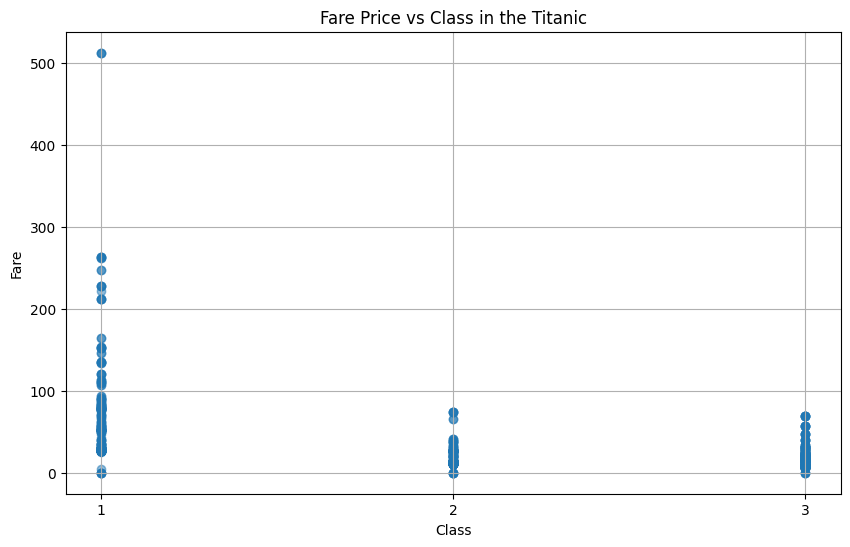

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(titanic_data['Pclass'], titanic_data['Fare'], alpha=0.5)
plt.title('Fare Price vs Class in the Titanic')
plt.xlabel('Class')
plt.xticks(ticks=range(int(titanic_data['Pclass'].min()), int(titanic_data['Pclass'].max()) + 1))
plt.ylabel('Fare')
plt.grid(True)
plt.show()

Now let's see the average price paid for each of the classes, and try to see if the price paid has something to do with the age

Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


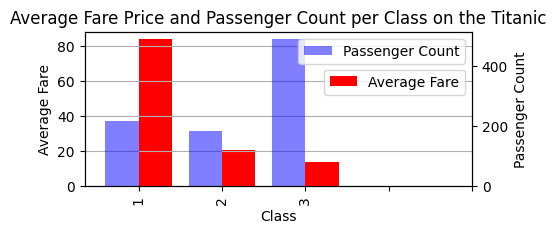

In [ ]:
# Calculate the average fare for each class
average_fare_per_class = titanic_data.groupby('Pclass')['Fare'].mean().sort_index()
# Calculate the number of passengers for each class
passenger_count_per_class = titanic_data['Pclass'].value_counts().sort_index()
# Plot the number of passengers per class on the same bar graph
fig, ax1 = plt.subplots(figsize=(5, 2))

# Plot average fare per class
average_fare_per_class.plot(kind='bar', color=['red'], ax=ax1, position=0, width=0.4)
ax1.set_ylabel('Average Fare')
ax1.set_xlabel('Class')
ax1.set_title('Average Fare Price and Passenger Count per Class on the Titanic')
ax1.grid(axis='y')

# Adjust the figure size to accommodate all bars
ax2 = ax1.twinx()
passenger_count_per_class.plot(kind='bar', color=['blue'], ax=ax2, position=1, width=0.4, alpha=0.5)
plt.xticks(ticks=range(len(pclass_values) + 2))
ax2.set_ylabel('Passenger Count')

# Add legends
ax1.legend(['Average Fare'], loc='upper right', bbox_to_anchor=(1, .80))
ax2.legend(['Passenger Count'], loc='upper right', bbox_to_anchor=(1, 1))

plt.show()